# Wordcloud

#### Importing useful libraries

In [2]:
# Import libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
import plotly.express as px
from datetime import datetime

#NLP libraries 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

/var/folders/j_/9989vv3d7z7c61s49rkzydxm0000gn/T/ipykernel_88100/1278799300.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


In [3]:
# Replace file path with the personal one in which the dataset is contained
chunk = pd.read_csv("/Users/eliacannas/Desktop/SentimentAnalysis/venv/tweets_sentimentAnalysis.csv", chunksize=100000,lineterminator='\n', low_memory=False)
dfSent = pd.concat(chunk)
dfSent.info()
dfSent.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689765 entries, 0 to 2689764
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    int64  
 5   user_friends      int64  
 6   user_favourites   int64  
 7   user_verified     bool   
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
       object t
 13  polarity          float64
 14  subjectivity      float64
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 289.9+ MB


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet\r,polarity,subjectivity
0,NFT Nomad 💎,NaN,NFT Creator:\nhttps://t.co/gz5OlavMCa,2021-11-24 07:08:31,65,64,111,False,2022-01-11 17:11:49,$ LNR going huge ! ! ! ! Kucoin bitmart listin...,"['Ethereum', 'crypto', 'cryptocurrency', 'nft'...",Twitter for Android,False\r,0.550000,0.650000
1,Digital Shogun ပωပ 🛡🌐⚔,Rings of Saturn,Non-Binary🏳️‍🌈Metaverse Builder. Web3 Content ...,2021-01-19 10:54:08,4082,221,59613,False,2022-01-11 17:11:49,"Another decent bounce # Bitcoin $ BTC 1w , 1d ...","['Bitcoin', 'HODL']",Twitter for Android,False\r,0.222222,0.518519
2,Conor Okus,Global,Making #Bitcoin more than an investment @spira...,2012-01-16 20:55:11,3771,439,11363,False,2022-01-11 17:11:49,Heads ! I 'll going live Thursday 18:30 UTC @ ...,['Bitcoin'],Twitter Web App,False\r,0.568182,0.400000
3,Kyptos.com,NaN,https://t.co/d03RricqLo - Latest News About Cr...,2021-09-20 02:40:53,10330,217,36,False,2022-01-11 17:11:50,Will LUNA Price Bounce Again .382 Fibonacci Re...,"['bitcoin', 'ElSalvador', 'metaverse', 'NFTs',...",IFTTT,False\r,0.000000,0.000000
4,Dr. Crypto Jones,"Atlanta, GA",I am NOT a financial advisor. I AM a cryptocur...,2021-03-21 01:27:11,19,109,132,False,2022-01-11 17:11:51,"Not much , 2022 good baby ! Bing bong ! # NFT ...","['NFT', 'Ethereum', 'Bitcoin']",Twitter for Android,False\r,0.450000,0.400000


#### Correcting column types


In [4]:
# Conversion of column types
dfSent = dfSent.convert_dtypes()
dfSent.dtypes

user_name           string[python]
user_location       string[python]
user_description    string[python]
user_created        string[python]
user_followers               Int64
user_friends                 Int64
user_favourites              Int64
user_verified              boolean
date                string[python]
text                string[python]
hashtags            string[python]
source              string[python]
is_retweet\r        string[python]
polarity                   Float64
subjectivity               Float64
dtype: object

#### Sentiment column creation based on polarity

In [5]:
# Assigning positive, negative or neutral value based on polarity, creating new column in dataset 'Sentiment' and removing unnecessary columns
df_sentiment = dfSent.copy()
df_sentiment['Sentiment'] = df_sentiment["polarity"].apply(lambda x: "Positive" if x > 0 else( "Negative" if x < 0  else "Neutral"))
df_sentiment.drop(['user_description','user_created','source','subjectivity'],axis=1,inplace=True)
df_sentiment.head()

,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,is_retweet\r,polarity,Sentiment
0,NFT Nomad 💎,<NA>,65,64,111,False,2022-01-11 17:11:49,$ LNR going huge ! ! ! ! Kucoin bitmart listin...,"['Ethereum', 'crypto', 'cryptocurrency', 'nft'...",False,0.55,Positive
1,Digital Shogun ပωပ 🛡🌐⚔,Rings of Saturn,4082,221,59613,False,2022-01-11 17:11:49,"Another decent bounce # Bitcoin $ BTC 1w , 1d ...","['Bitcoin', 'HODL']",False,0.222222,Positive
2,Conor Okus,Global,3771,439,11363,False,2022-01-11 17:11:49,Heads ! I 'll going live Thursday 18:30 UTC @ ...,['Bitcoin'],False,0.568182,Positive
3,Kyptos.com,<NA>,10330,217,36,False,2022-01-11 17:11:50,Will LUNA Price Bounce Again .382 Fibonacci Re...,"['bitcoin', 'ElSalvador', 'metaverse', 'NFTs',...",False,0.0,Neutral
4,Dr. Crypto Jones,"Atlanta, GA",19,109,132,False,2022-01-11 17:11:51,"Not much , 2022 good baby ! Bing bong ! # NFT ...","['NFT', 'Ethereum', 'Bitcoin']",False,0.45,Positive


In [6]:
# String formatting
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d %H:%M:%S').dt.date

#### Breakdown of analysis periods

In [7]:
# Import nltk stopwords and customize it to add common crypto words that don't add too much information 
# Filter the DataFrame for dates between the two periods of interest (found in the sentiment)

# First period
start_date1 = pd.to_datetime('2022-05-11').date()
end_date1 = pd.to_datetime('2022-05-14').date()
df_date_clean1 = df_sentiment[(df_sentiment['date'] >= start_date1) & (df_sentiment['date'] <= end_date1)& (df_sentiment['Sentiment'] == 'Negative') & (df_sentiment['user_name']!= 'ClankApp - Crypto Whales Tracker 🐳')]

start_date2 = pd.to_datetime('2022-06-14').date()
end_date2 = pd.to_datetime('2022-06-17').date()
df_date_clean2 = df_sentiment[(df_sentiment['date'] >= start_date2) & (df_sentiment['date'] <= end_date2)& (df_sentiment['Sentiment'] == 'Negative') & (df_sentiment['user_name']!= 'ClankApp - Crypto Whales Tracker 🐳') & (df_sentiment['user_name']!= 'Whale Alerts (Bitomic)')& (df_sentiment['user_name']!= 'Mempool Whales 🐋')& (df_sentiment['user_name']!= 'Whales Radar')]

#### Preprocessing of tweets

In [8]:
# Preprocess tweet
stopwords = nltk.corpus.stopwords.words('english')

# Common word removals
crypto_words = ['btc','bitcoin','eth','etherum','crypto','co','n']

stopwords = stopwords + crypto_words

def preprocess_tweet(tweet, stopwords):
    tweet = tweet.lower()    
    tweet = tweet.replace('\n\n',' ')
    
    # Remove English stopwords
    tweet = ' '.join([word for word in tweet.split() if word not in stopwords])
    # Remove links
    tweet = re.sub(r'http\S+', '', tweet)
    # Removing regular expression that preprocesses tweets
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ", tweet).split())
    
    return tweet

In [9]:
# Preprocess for first period
df_date_clean1['preprocess_tweets'] = df_date_clean1['text'].map(lambda x:preprocess_tweet(x, stopwords=stopwords))
# Preprocess second period
df_date_clean2['preprocess_tweets'] = df_date_clean2['text'].map(lambda x:preprocess_tweet(x, stopwords=stopwords))

/var/folders/j_/9989vv3d7z7c61s49rkzydxm0000gn/T/ipykernel_88100/1636189848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean1['preprocess_tweets'] = df_date_clean1['text'].map(lambda x:preprocess_tweet(x, stopwords=stopwords))
/var/folders/j_/9989vv3d7z7c61s49rkzydxm0000gn/T/ipykernel_88100/1636189848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_clean2['preprocess_tweets'] = df_date_clean2['text'].map(lambda x:preprocess_tweet(x, stopwords=stopwords))


#### Word cloud generation

In [10]:
# Word cloud creation
from wordcloud import WordCloud

# Define method for creat words_cloud
def words_cloud(df, col):
    
    text = ' '.join(str(comment) for comment in df[col])
    
    # Definition attributed word cloud
    wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white",max_words=70).generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.rcParams['figure.figsize'] = (30, 30)
    plt.axis("off")
    plt.show()

#### Printout of the results

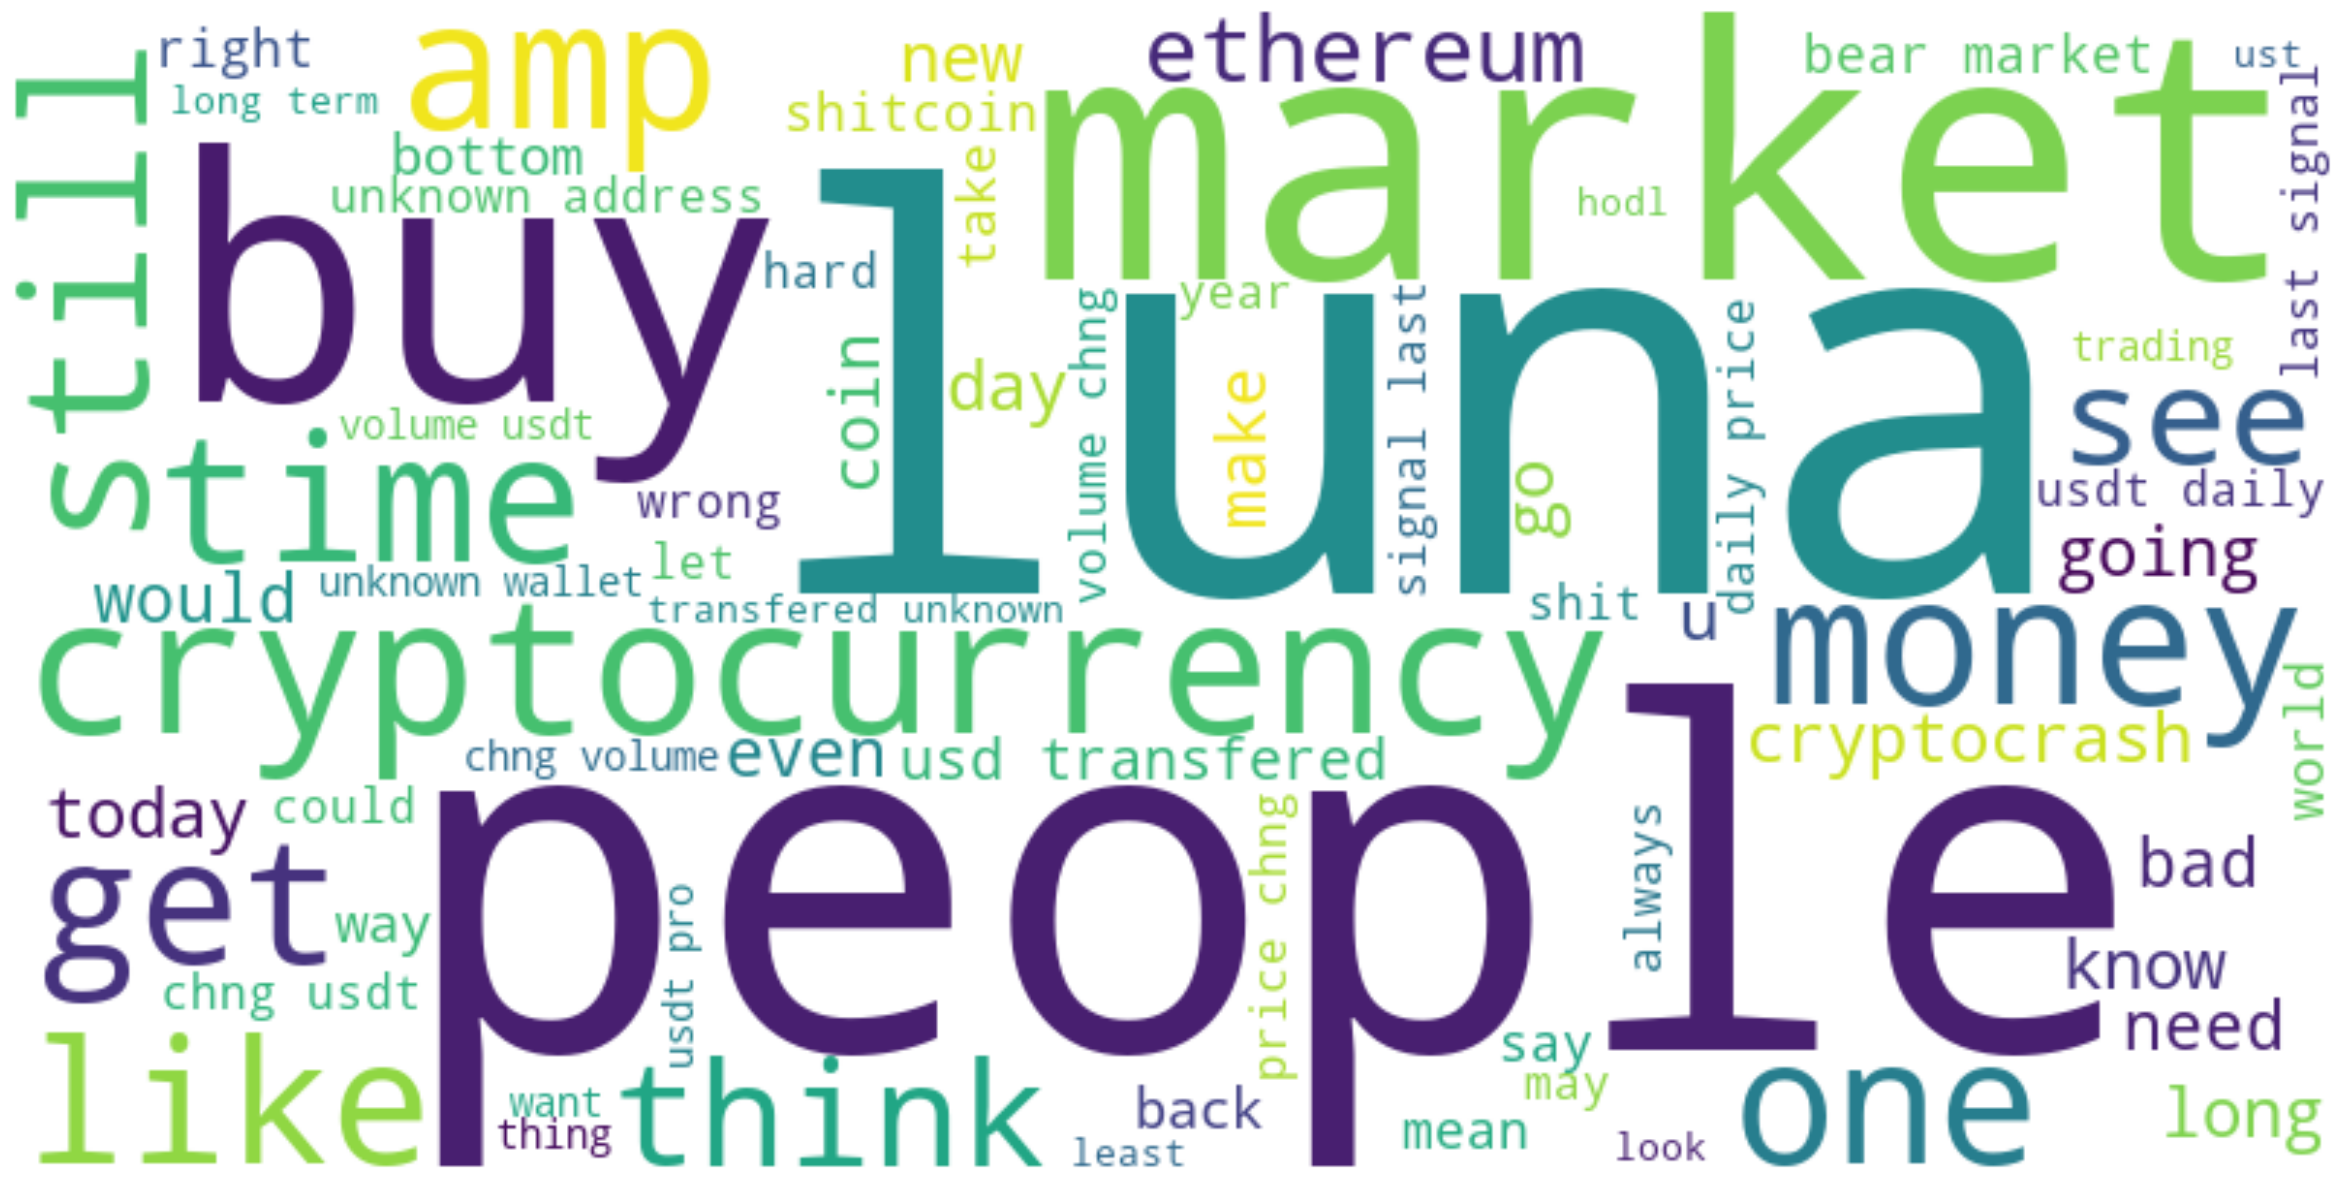

In [14]:
# Word cloud first period
words_cloud(df_date_clean1, 'preprocess_tweets')

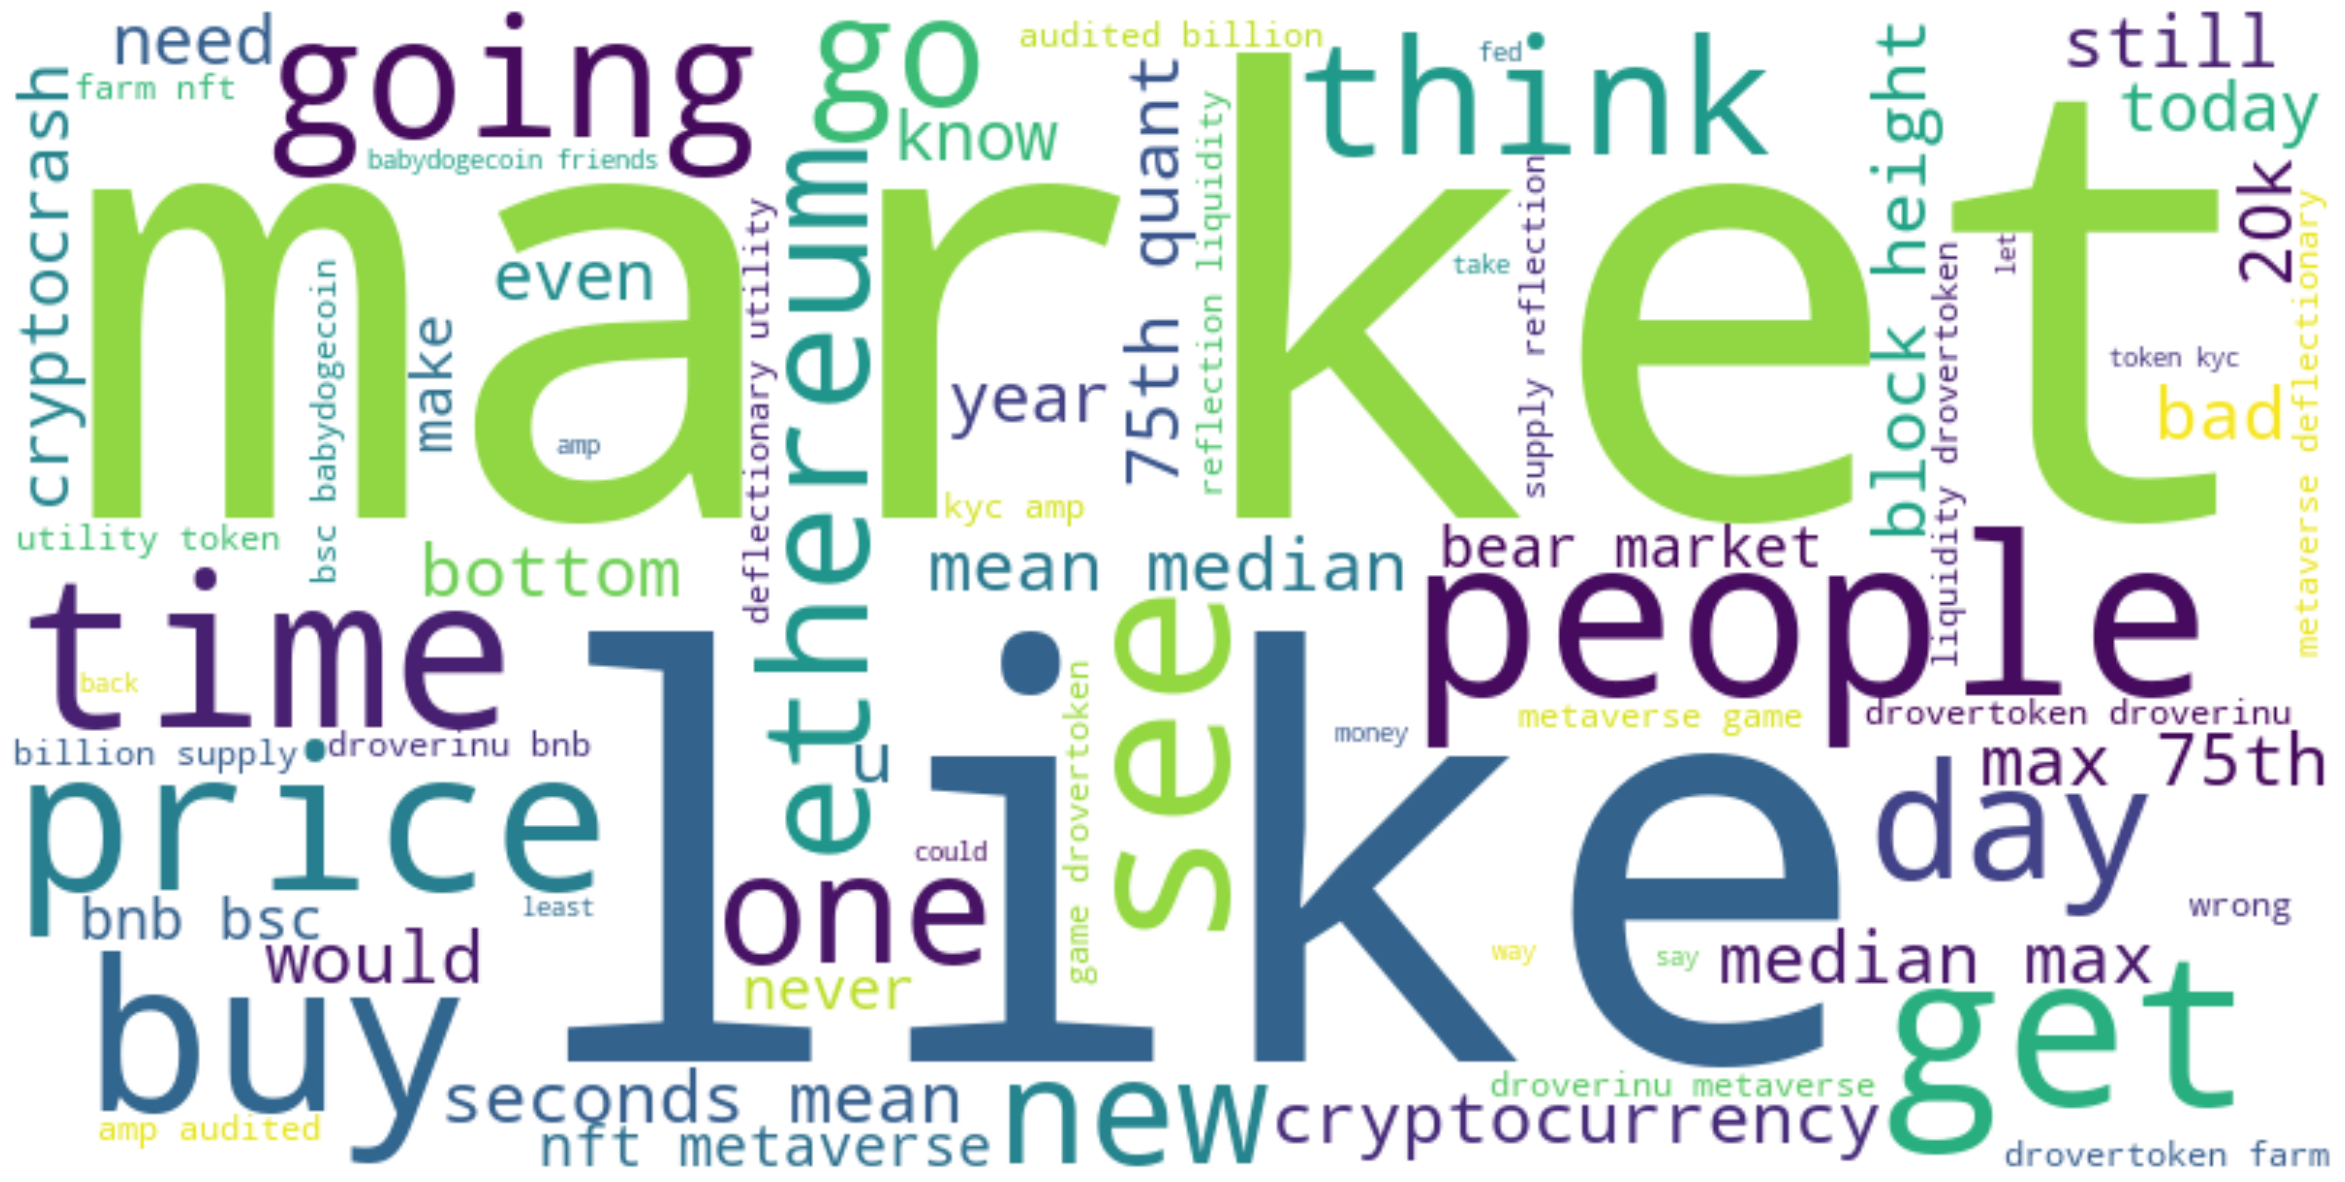

In [12]:
# Word cloud second period
words_cloud(df_date_clean2, 'preprocess_tweets')

In [15]:
# Function to search the number of times a word is contained in tweets, so as to remove bot-generated tweets to refine the word cloud result
def print_and_count_tweets_containing_word(df, word):
    # Filter tweets that contain the specified word
    tweet_containing_word = df[df['preprocess_tweets'].str.contains(word, case=False)]
    
    # Count the number of tweets containing the specified word
    tweet_number = len(tweet_containing_word)
    
    # Print the number of tweets
    print(f"Number of tweets containing the word '{word}': {tweet_number}")
    
    # Print tweets that contain the specified word
    for index, row in tweet_containing_word.iterrows():
        print(row['text'])
        print(row['user_name'])
        print('\n')

# Example
word_searched = "hello"
print_and_count_tweets_containing_word(df_date_clean2, word_searched)

Number of tweets containing the word 'hello': 10
hello , , really really rich ..... please heart .. T , T lost everything earned 12years ... luna ... nothing rest ... hard time T , T ... less please .. 0x223e8cdc638e7bf4e86a3af2aaee21585ba5adfc # crypto # btc # eth https : //t.co/z16UijqGus
hyun lee


Hello # hex haters ! Hope 's well . If have/had something bad say $ hex 's chance stardom ! Reach ! # BTC # ETH # Cryptos # Cryptocrash https : //t.co/PBoTI2QyBT
Bobbie H.


hello everyone , We @ oasis_finance giving $ 100 # btc 300 random participant participate Liking , Retweeting , Following Us commenting # BTC Address . # Airdrops , # Etherum # ETH , # BNB , # NFTs # SOL , # Airdrops , # BSC # CryptoMarket # cryptocurrencies ,
Oasis Finance


Hello , nym Lokul , I work dirty job , I ’ # bitcoin maxi . https : //t.co/VQys0vzvNU
WARTIME LOKUL (Pr 13:11) ☣️✏️🐝


hello @ cz_binance . market bleeding weeks . I . long wait ? # Binance # BTC # ETH
BAGAYA ADAMA


@ HelloMikeMorgan Your right 